In [0]:
from keras import layers
from keras import models

#Defining our model's structure 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

Using TensorFlow backend.
W0714 13:13:46.839890 139719283484544 module_wrapper.py:126] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/util/module_wrapper.py:153: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 13:13:46.858107 139719283484544 module_wrapper.py:126] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/util/module_wrapper.py:153: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [0]:
#Importing the MNIST dataset (Handwritten digits)
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels),(test_images , test_labels) = mnist.load_data()

#Reshaping each image for suitale tensor operation
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

#Converting labels into tensor of 0s and 1
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#Defining optimizing algorithm, lossfunction and metric
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Training the model
history = model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 41s 677us/step - loss: 0.0211 - acc: 0.9933
Epoch 2/5
60000/60000 [==============================] - 40s 668us/step - loss: 0.0165 - acc: 0.9950
Epoch 3/5
60000/60000 [==============================] - 41s 676us/step - loss: 0.0130 - acc: 0.9956
Epoch 4/5
60000/60000 [==============================] - 40s 666us/step - loss: 0.0106 - acc: 0.9964
Epoch 5/5
60000/60000 [==============================] - 40s 667us/step - loss: 0.0094 - acc: 0.9970


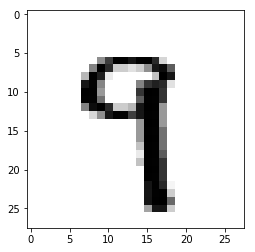

In [0]:
#Sample Image from the MNIST dataset

import matplotlib.pyplot as plt
import numpy as np
two_d = (np.reshape(train_images[9081], (28, 28)) * 255).astype(np.uint8)
plt.imshow(two_d, cmap = plt.cm.binary)
plt.show()
#print(train_images[0])

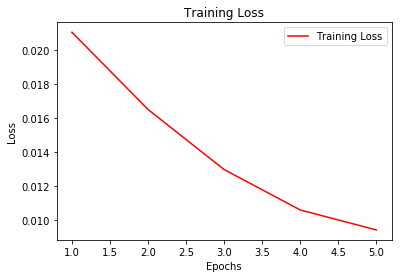

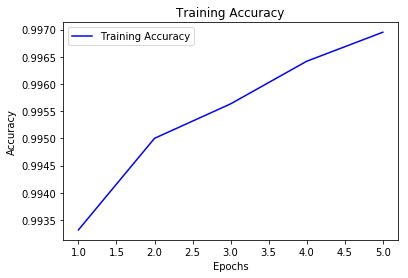

In [0]:
#Representation on Loss and Accuracy

hist_dict = history.history
acc = hist_dict['acc']
loss = hist_dict['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs,loss, 'r', label = 'Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs,acc, 'b', label = 'Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#Testing the model with test dataset

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss : " + str(test_loss))
print("Test Accuracy : " + str(test_accuracy))

10000/10000 [==============================] - 2s 250us/step
Test Loss : 0.02675447324578163
Test Accuracy : 0.993
